# Load Libraries:

In [0]:
# Import libraries for data preprocessing:
from pandas import DataFrame
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder


# Import library for visulization:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Implot Plotly library for static parallel coordinates plot:
import plotly.express as px

# Implot Plotly library for interactive parallel coordinates plot:
import plotly.graph_objects as go

# Load Data from Github:

In [2]:
# Load dataset from the source link into Pandas Dataframe:
df = pd.read_csv("https://raw.githubusercontent.com/techill/data-vis_fall_2019/master/employee_data.csv", header = 0)

# Print the data type of the variable:
print(type(df))

# Print the first n rows of the dataframe:
df

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574
...,...,...,...,...,...,...,...
995,995,995,O,33,7,7,2996
996,996,996,O,21,1,2,667
997,997,997,O,49,9,7,4158
998,998,998,AB,56,6,7,2414


In [3]:
df.shape

(1000, 7)

In [4]:
# Count the number of missing values in each column:
df.isnull().sum()

Unnamed: 0          0
id                  0
groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,id,age,healthy_eating,active_lifestyle,salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,499.500000,41.155000,4.944000,5.683000,2227.46100
std,288.819436,288.819436,13.462995,2.013186,2.048587,1080.20976
min,0.000000,0.000000,18.000000,0.000000,0.000000,553.00000
25%,249.750000,249.750000,30.000000,4.000000,4.000000,1360.00000
50%,499.500000,499.500000,41.000000,5.000000,6.000000,2174.00000
75%,749.250000,749.250000,53.000000,6.000000,7.000000,2993.75000
max,999.000000,999.000000,64.000000,10.000000,10.000000,5550.00000


In [6]:
# # Remove columns from a dataframe by iloc:
# df.drop(df.iloc[:, 0:2], inplace = True, axis = 1)   # 0:2 indicates removing columns from from Index 0 to 1.

# Remove columns from a dataframe by column index:
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,55,3,5,1134
2,A,61,8,1,4969
3,O,29,3,6,902
4,O,34,6,2,3574
...,...,...,...,...,...
995,O,33,7,7,2996
996,O,21,1,2,667
997,O,49,9,7,4158
998,AB,56,6,7,2414


# Correlation Matrix: Scatterplot Matrix

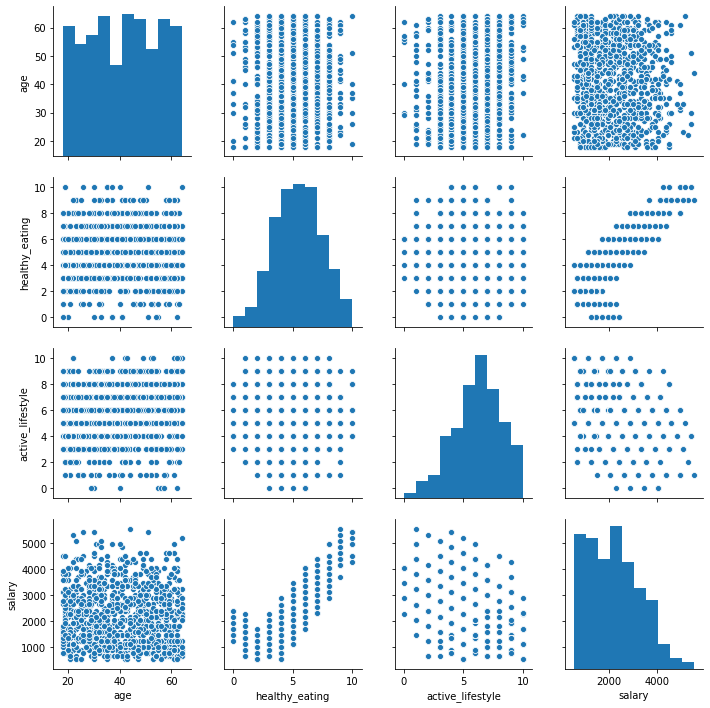

In [7]:
# import seaborn as sns

# Plot correlation matrices between every two numeric features:
sns.pairplot(df)
plt.show()

# Correlation Matrix: Heatmap

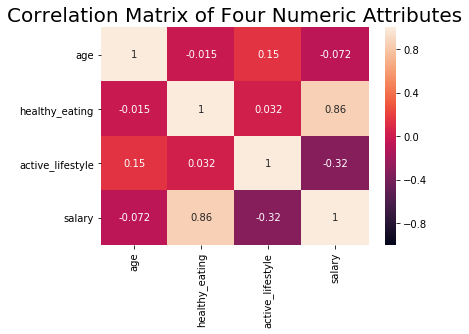

In [8]:
# import seaborn as sns

# Heatmap of Correlations Matrix:
df.corr()
sns.heatmap(df.corr(), 
            vmin = -1,   # Set the minimun value of the color scale as -1.
            annot = True)   # Add annotation of coefficients to the heatmap.

# Fix the bug that cuts off top/bottom of Seaborn visualization:
b, t = plt.ylim() # Find out the values for bottom and top.
b += 0.5 # Add 0.5 to the bottom.
t -= 0.5 # Subtract 0.5 from the top.
plt.ylim(b, t) # Update the ylim(bottom, top) values.

plt.title('Correlation Matrix of Four Numeric Attributes', fontsize = 20)
plt.show()

# Correlation Matrix: Scatterplot Matrix w. Coefficients

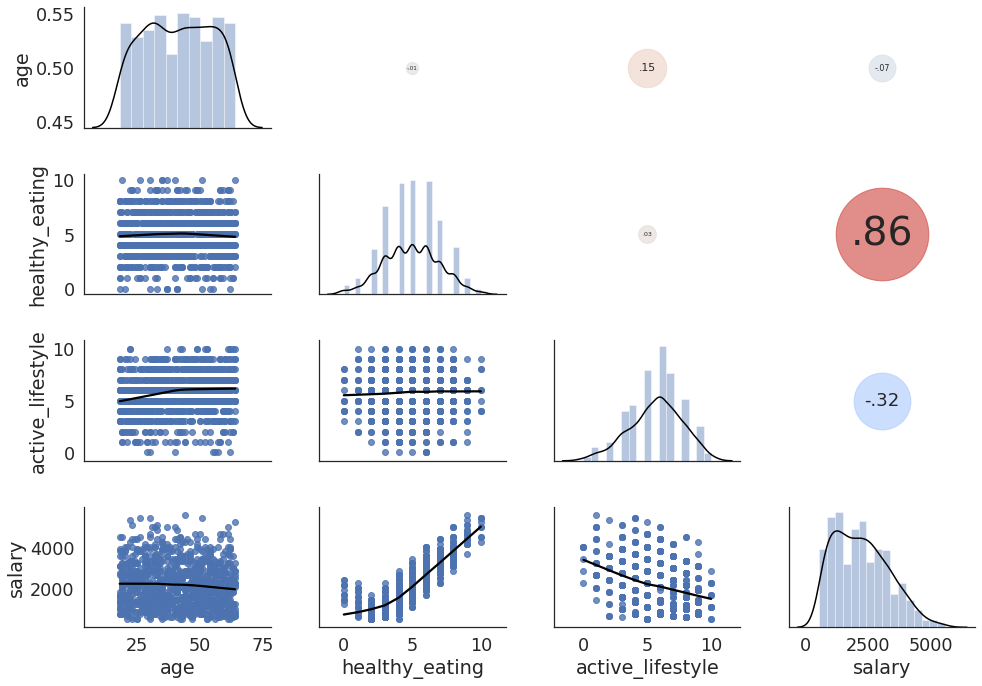

In [9]:
# import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha = 0.6, cmap = "coolwarm",
               vmin = -1, vmax = 1, transform = ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords = "axes fraction",
                ha = 'center', va = 'center', fontsize = font_size)

sns.set(style = 'white', font_scale = 1.6)
cmc = sns.PairGrid(df, aspect = 1.4, diag_sharey = False)
cmc.map_lower(sns.regplot, lowess = True, ci = False, line_kws = {'color': 'black'})
cmc.map_diag(sns.distplot, kde_kws = {'color': 'black'})
cmc.map_upper(corrdot)

plt.show()

# Convert Categorical Data to Numeric Data:

In [10]:
df

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,55,3,5,1134
2,A,61,8,1,4969
3,O,29,3,6,902
4,O,34,6,2,3574
...,...,...,...,...,...
995,O,33,7,7,2996
996,O,21,1,2,667
997,O,49,9,7,4158
998,AB,56,6,7,2414


In [11]:
# from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder:
lbEncoder = LabelEncoder()

# Covert the categorical data of groups into numeric codes:
df["blood_group_code"] = lbEncoder.fit_transform(df["groups"])

df.head()

,groups,age,healthy_eating,active_lifestyle,salary,blood_group_code
0,A,36,5,5,2297,0
1,A,55,3,5,1134,0
2,A,61,8,1,4969,0
3,O,29,3,6,902,3
4,O,34,6,2,3574,3


# Parallel Coordinates: Static

In [12]:
# import plotly.express as px

figPCstatic = px.parallel_coordinates(df, color = "blood_group_code", 
                              labels = {"age": "Age",	
                                        "healthy_eating": "Healthy Eating Scale",	
                                        "active_lifestyle": "Active Lifestyle Scale",
                                        "salary": "Monthly Salary", 
                                        "blood_group_code": "Blood Group"},
                              color_continuous_scale = px.colors.diverging.Tealrose, 
                              color_continuous_midpoint = 2)

figPCstatic.show()

# Parallel Coordinates: Interactive

In [13]:
df.describe()

,age,healthy_eating,active_lifestyle,salary,blood_group_code
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,41.155000,4.944000,5.683000,2227.46100,1.500000
std,13.462995,2.013186,2.048587,1080.20976,1.323538
min,18.000000,0.000000,0.000000,553.00000,0.000000
25%,30.000000,4.000000,4.000000,1360.00000,0.000000
50%,41.000000,5.000000,6.000000,2174.00000,1.500000
75%,53.000000,6.000000,7.000000,2993.75000,3.000000
max,64.000000,10.000000,10.000000,5550.00000,3.000000


In [14]:
df['groups'].value_counts()

A     375
O     375
B     125
AB    125
Name: groups, dtype: int64

In [15]:
df['blood_group_code'].value_counts()

3    375
0    375
2    125
1    125
Name: blood_group_code, dtype: int64

In [16]:
# import plotly.graph_objects as go

figPCinteractive = go.Figure(data = 
                             go.Parcoords(
                                 line = dict(color = df["blood_group_code"], 
                                             colorscale = "Viridis",
                                             showscale = True),
                                 dimensions = list([
                                                  dict(range = [18, 64], 
                                                        label = "Age", values = df["age"]),
                                                  dict(range = [0, 10], 
                                                        label = "Healthy Eating Scale", values = df['healthy_eating']),
                                                  dict(range = [1, 10], 
                                                        label = "Active Lifestyle Scale", values = df['active_lifestyle']),
                                                  dict(range = [0, 6000], 
                                                        label = "Salary", values = df['salary']),
                                                  dict(tickvals = [0, 1, 2, 3], 
                                                        ticktext = ["A", "AB", "B", "O"],
                                                        label = "Blood Group", values = df['blood_group_code'])
                                ])                
))

figPCinteractive.show()